# Impact of using I-type and/S-type blocks in P-type frames

In [1]:
sequence = "bus"

In [2]:
!../sequences/$sequence/runme.sh

bus_cif.y4m exists.
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-libzimg 

## Without I-type blocks

In [3]:
!sed -z -i 's/\n#import image_IPP as codec\n/\nimport image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

In [4]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	import image_IPP as codec
    12	#import image_IPP_adaptive as codec
    13	#import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [5]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.44771762766554435 KBPS: 4084.904 Average AMSE: 51.79169143693881
     2	Q_step: 24 BPP: 0.3340970468574635 KBPS: 3048.248 Average AMSE: 80.12090260241303
     3	Q_step: 27 BPP: 0.24263555695847364 KBPS: 2213.768 Average AMSE: 127.7267672383558
     4	Q_step: 30 BPP: 0.1719030583613917 KBPS: 1568.416 Average AMSE: 205.54738169454964
     5	Q_step: 33 BPP: 0.11975922418630752 KBPS: 1092.664 Average AMSE: 327.4852363697742
     6	Q_step: 36 BPP: 0.08329212261503928 KBPS: 759.944 Average AMSE: 484.2601539483375
     7	Q_step: 39 BPP: 0.06171261223344557 KBPS: 563.056 Average AMSE: 654.9678233068532


In [6]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/no_I-blocks.txt

In [7]:
!cat /tmp/no_I-blocks.txt

0.44771762766554435	51.79169143693881
0.3340970468574635	80.12090260241303
0.24263555695847364	127.7267672383558
0.1719030583613917	205.54738169454964
0.11975922418630752	327.4852363697742
0.08329212261503928	484.2601539483375
0.06171261223344557	654.9678233068532


In [8]:
RD_no_Iblocks = []
with open("/tmp/no_I-blocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_no_Iblocks.append((float(rate), float(_distortion)))

## Considering also I-type blocks

In [9]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as codec\n/\nimport image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

!sed -z -i 's!  return self.decide_types_0!  #return self.decide_types_0!g' image_IPP_adaptive.py
!sed -z -i 's!  #return self.decide_types_1!  return self.decide_types_1!g' image_IPP_adaptive.py

In [10]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"
!cat -n image_IPP_adaptive.py | grep "return self.decide_types"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	#import image_IPP as codec
    12	import image_IPP_adaptive as codec
    13	#import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None
    51	        #return self.decide_types_0(video, k, q_step, V_k, reconstructed_V_k, E_k, prediction_V_k, block_y_side, block_x_side, averages)
    52	        return self.decide_types_1(video, k, q_step, V_k, reconstructed_V_k, E_k, prediction_V_k, block_y_side, block_x_side, averages)


In [11]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 1.2682230289001122 KBPS: 11571.064 Average AMSE: 8014.196009794121
     2	Q_step: 24 BPP: 1.0257566989337823 KBPS: 9358.84 Average AMSE: 8014.940654812008
     3	Q_step: 27 BPP: 0.827488425925926 KBPS: 7549.872 Average AMSE: 8016.1075852930335
     4	Q_step: 30 BPP: 0.68084052328844 KBPS: 6211.88 Average AMSE: 8017.688485878752
     5	Q_step: 33 BPP: 0.5590970468574635 KBPS: 5101.112 Average AMSE: 8020.169220196758
     6	Q_step: 36 BPP: 0.47152777777777777 KBPS: 4302.144 Average AMSE: 8023.696106135135
     7	Q_step: 39 BPP: 0.41777935606060607 KBPS: 3811.7520000000004 Average AMSE: 8027.704251389764


In [12]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/with_I-blocks.txt

In [13]:
!cat /tmp/with_I-blocks.txt

1.2682230289001122	8014.196009794121
1.0257566989337823	8014.940654812008
0.827488425925926	8016.1075852930335
0.68084052328844	8017.688485878752
0.5590970468574635	8020.169220196758
0.47152777777777777	8023.696106135135
0.41777935606060607	8027.704251389764


In [14]:
RD_with_Iblocks = []
with open("/tmp/with_I-blocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_with_Iblocks.append((float(rate), float(_distortion)))

## Considering also S-type blocks

In [15]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as codec\n/\nimport image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

!sed -z -i 's!  #return self.decide_types_0!  return self.decide_types_0!g' image_IPP_adaptive.py
!sed -z -i 's!  return self.decide_types_1!  #return self.decide_types_1!g' image_IPP_adaptive.py

In [16]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"
!cat -n image_IPP_adaptive.py | grep "return self.decide_types"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	#import image_IPP as codec
    12	import image_IPP_adaptive as codec
    13	#import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None
    51	        return self.decide_types_0(video, k, q_step, V_k, reconstructed_V_k, E_k, prediction_V_k, block_y_side, block_x_side, averages)
    52	        #return self.decide_types_1(video, k, q_step, V_k, reconstructed_V_k, E_k, prediction_V_k, block_y_side, block_x_side, averages)


In [17]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.04271797839506172 KBPS: 389.75199999999995 Average AMSE: 8014.196009794121
     2	Q_step: 24 BPP: 0.038992354096520764 KBPS: 355.76 Average AMSE: 8014.940654812008
     3	Q_step: 27 BPP: 0.03603482744107744 KBPS: 328.77599999999995 Average AMSE: 8016.1075852930335
     4	Q_step: 30 BPP: 0.03360602553310887 KBPS: 306.616 Average AMSE: 8017.688485878752
     5	Q_step: 33 BPP: 0.0318655303030303 KBPS: 290.736 Average AMSE: 8020.169220196758
     6	Q_step: 36 BPP: 0.030632716049382717 KBPS: 279.488 Average AMSE: 8023.696106135135
     7	Q_step: 39 BPP: 0.02999175785634119 KBPS: 273.64 Average AMSE: 8027.704251389764


In [18]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/with_S-blocks.txt

In [19]:
!cat /tmp/with_S-blocks.txt

0.04271797839506172	8014.196009794121
0.038992354096520764	8014.940654812008
0.03603482744107744	8016.1075852930335
0.03360602553310887	8017.688485878752
0.0318655303030303	8020.169220196758
0.030632716049382717	8023.696106135135
0.02999175785634119	8027.704251389764


In [20]:
RD_with_Sblocks = []
with open("/tmp/with_S-blocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_with_Sblocks.append((float(rate), float(_distortion)))

## Considering all S-type blocks

In [21]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as codec\n/\nimport image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

!sed -z -i 's!  #return self.decide_types_0!  return self.decide_types_0!g' image_IPP_adaptive.py
!sed -z -i 's!  return self.decide_types_1!  #return self.decide_types_1!g' image_IPP_adaptive.py

!sed -z -i 's!E_k_block_entropy < 6!E_k_block_entropy < 106!g' image_IPP_adaptive.py

In [22]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"
!cat -n image_IPP_adaptive.py | grep "return self.decide_types"
!cat -n image_IPP_adaptive.py | grep "E_k_block_entropy" | grep 106

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	#import image_IPP as codec
    12	import image_IPP_adaptive as codec
    13	#import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None
    51	        return self.decide_types_0(video, k, q_step, V_k, reconstructed_V_k, E_k, prediction_V_k, block_y_side, block_x_side, averages)
    52	        #return self.decide_types_1(video, k, q_step, V_k, reconstructed_V_k, E_k, prediction_V_k, block_y_side, block_x_side, averages)
    64	                if E_k_block_entropy < 106:


In [23]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.04271797839506172 KBPS: 389.75199999999995 Average AMSE: 8014.196009794121
     2	Q_step: 24 BPP: 0.038992354096520764 KBPS: 355.76 Average AMSE: 8014.940654812008
     3	Q_step: 27 BPP: 0.03603482744107744 KBPS: 328.77599999999995 Average AMSE: 8016.1075852930335
     4	Q_step: 30 BPP: 0.03360602553310887 KBPS: 306.616 Average AMSE: 8017.688485878752
     5	Q_step: 33 BPP: 0.0318655303030303 KBPS: 290.736 Average AMSE: 8020.169220196758
     6	Q_step: 36 BPP: 0.030632716049382717 KBPS: 279.488 Average AMSE: 8023.696106135135
     7	Q_step: 39 BPP: 0.02999175785634119 KBPS: 273.64 Average AMSE: 8027.704251389764


In [24]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/all_S-blocks.txt

In [25]:
!cat /tmp/all_S-blocks.txt

0.04271797839506172	8014.196009794121
0.038992354096520764	8014.940654812008
0.03603482744107744	8016.1075852930335
0.03360602553310887	8017.688485878752
0.0318655303030303	8020.169220196758
0.030632716049382717	8023.696106135135
0.02999175785634119	8027.704251389764


In [26]:
RD_all_Sblocks = []
with open("/tmp/all_S-blocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_all_Sblocks.append((float(rate), float(_distortion)))

## MP4

In [27]:
!sed -z -i 's!\nimport image_IPP as codec!\n#import image_IPP as codec!g' RD_curve.py
!sed -z -i 's!\nimport image_IPP_adaptive as codec\n!\n#import image_IPP_adaptive as codec\n!g' RD_curve.py
!sed -z -i 's!\nimport IPP_compressor as codec\n!\n#import IPP_compressor as codec\n!g' RD_curve.py
!sed -z -i 's!\n#import MP4 as codec\n!\nimport MP4 as codec\n!g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

In [28]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	#import image_IPP as codec
    12	#import image_IPP_adaptive as codec
    13	import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [29]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-libzimg --enable-nvdec --ena

frame=   30 fps=0.0 q=-1.0 Lsize=     377kB time=00:00:01.16 bitrate=2665.3kbits/s speed=3.87x    
video:376kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.251082%
[libx264rgb @ 0x5647fe6bddc0] frame I:1     Avg QP:31.03  size: 43217
[libx264rgb @ 0x5647fe6bddc0] frame P:29    Avg QP:31.25  size: 11782
[libx264rgb @ 0x5647fe6bddc0] mb I  I16..4:  4.0% 41.7% 54.3%
[libx264rgb @ 0x5647fe6bddc0] mb P  I16..4:  0.2%  0.2%  0.7%  P16..4: 27.5% 30.4% 39.6%  0.0%  0.0%    skip: 1.5%
[libx264rgb @ 0x5647fe6bddc0] 8x8 transform intra:35.7% inter:58.1%
[libx264rgb @ 0x5647fe6bddc0] coded y,u,v intra: 88.4% 94.0% 93.5% inter: 37.4% 62.2% 56.1%
[libx264rgb @ 0x5647fe6bddc0] i16 v,h,dc,p: 29% 65%  3%  3%
[libx264rgb @ 0x5647fe6bddc0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 17% 18% 21%  5%  7%  5%  9%  6% 12%
[libx264rgb @ 0x5647fe6bddc0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 27% 30% 14%  4%  5%  5%  5%  5%  5%
[libx264rgb @ 0x5647fe6bddc0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx26

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=9.17x    
video:7478kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

frame=   30 fps=0.0 q=-1.0 Lsize=     132kB time=00:00:01.16 bitrate= 931.1kbits/s speed=4.95x    
video:131kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.722092%
[libx264rgb @ 0x56009cd38dc0] frame I:1     Avg QP:40.03  size: 20235
[libx264rgb @ 0x56009cd38dc0] frame P:29    Avg QP:40.37  size:  3903
[libx264rgb @ 0x56009cd38dc0] mb I  I16..4: 11.4% 48.2% 40.4%
[libx264rgb @ 0x56009cd38dc0] mb P  I16..4:  0.5%  0.4%  0.5%  P16..4: 39.4% 19.8% 21.9%  0.0%  0.0%    skip:17.6%
[libx264rgb @ 0x56009cd38dc0] 8x8 transform intra:42.6% inter:59.8%
[libx264rgb @ 0x56009cd38dc0] coded y,u,v intra: 61.8% 78.8% 82.7% inter: 10.7% 27.4% 28.1%
[libx264rgb @ 0x56009cd38dc0] i16 v,h,dc,p: 23% 55% 16%  6%
[libx264rgb @ 0x56009cd38dc0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 22% 20% 29%  4%  4%  4%  4%  4%  8%
[libx264rgb @ 0x56009cd38dc0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 30% 28% 19%  3%  4%  4%  5%  3%  4%
[libx264rgb @ 0x56009cd38dc0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx26

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=6.13x    
video:7183kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

In [30]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MP4.txt

In [31]:
!cat /tmp/MP4.txt

0.5263064674523008	18.976771074459872
0.33889151936026934	30.64055792297979
0.2249815867003367	47.544098756663864
0.15774147727272728	70.95086520587823
0.11839137906846241	101.60439935378086
0.09477413019079686	141.6871334876543
0.0815525042087542	193.31282530162738


In [32]:
RD_MP4 = []
with open("/tmp/MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MP4.append((float(rate), float(_distortion)))

## Comparison

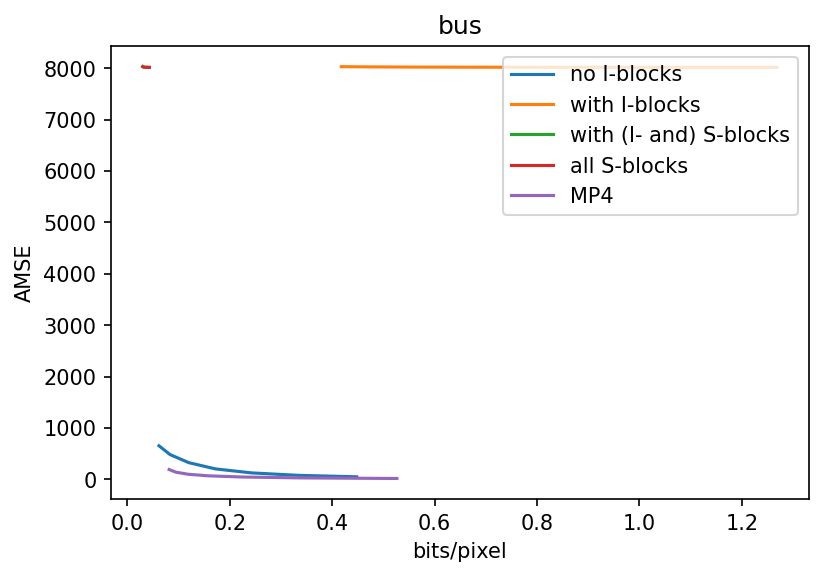

In [33]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_no_Iblocks), label="no I-blocks")
pylab.plot(*zip(*RD_with_Iblocks), label="with I-blocks")
pylab.plot(*zip(*RD_with_Sblocks), label="with (I- and) S-blocks")
pylab.plot(*zip(*RD_all_Sblocks), label="all S-blocks")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("bits/pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

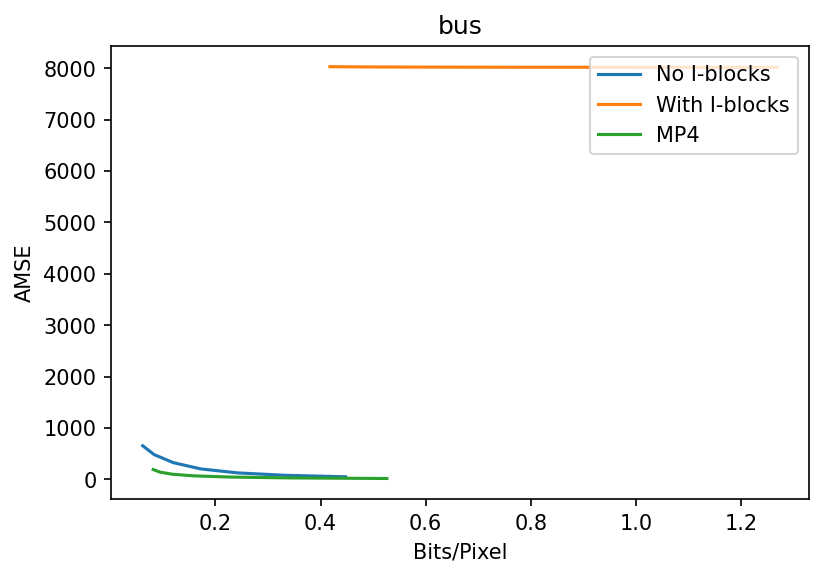

In [34]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_no_Iblocks), label="No I-blocks")
pylab.plot(*zip(*RD_with_Iblocks), label="With I-blocks")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

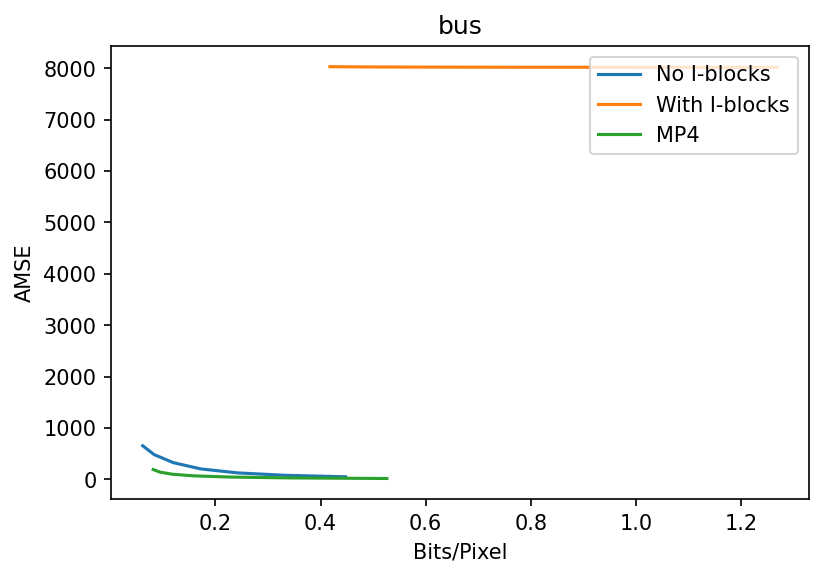

In [35]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_no_Iblocks), label="No I-blocks")
pylab.plot(*zip(*RD_with_Iblocks), label="With I-blocks")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

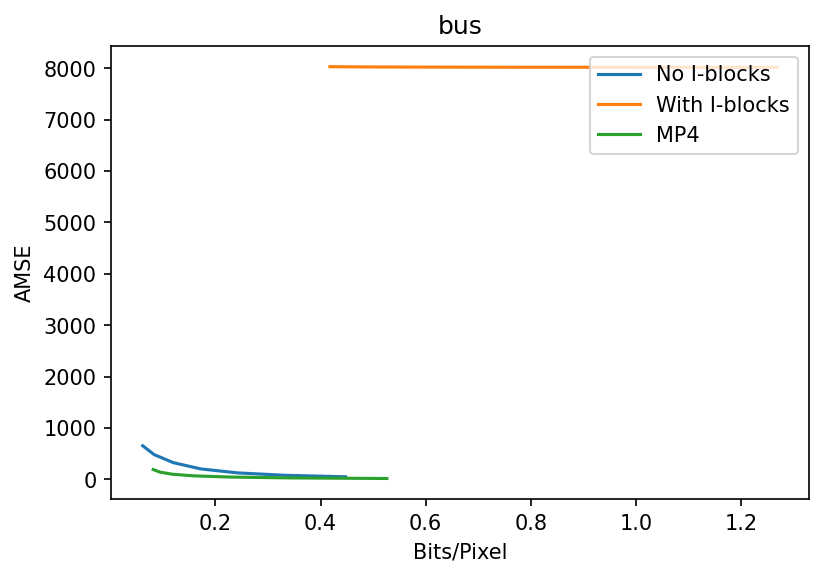

In [36]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_no_Iblocks), label="No I-blocks")
pylab.plot(*zip(*RD_with_Iblocks), label="With I-blocks")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()